In [1]:
# Carga inicial de librerías
import pandas as pd
import numpy as np
from datetime import datetime
from statistics import mean
import matplotlib.pyplot as plt

In [2]:
# Métodos auxiliares que nos van a ayudar en los análisis

def comporbar_valores_perdidos(df):
    '''Compruba si existen valores perdidos en el DataFrame
    
    Args:
    df (DataFrame): DataFrame con los datos para comprobar la existencia de datos perdidos
    '''
    # Buscamos los valores vacíos
    print("\nValores no definidos:")
    print(df.isna().sum())
    
    # Buscamos los valores nulos
    print("\nValores nulos:")
    print(df.isnull().sum())
    
    
# Fecha inicial desde la que se tienen los datos de casos de COVID
fecha_inicio = datetime(2021, 1, 1)
# Fecha final hasta la que se tienen los datos de casos de COVID
fecha_fin = datetime(2022, 3, 29)
# Rango de fechas de la que tenemos datos de casos de COVID
rango_fechas = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='D')

def comprobar_fechas_isla(df):
    '''Compruba si existe alguna fecha para lo que no se tenga datos de una isla
    
    Args:
    df (DataFrame): DataFrame con los datos de la serie temporal de los casos de COVID para una isla
    
    Returns:
    fechas_faltantes (list): Listado con las fechas para las que no se tiene datos
    '''
    fechas_faltantes = rango_fechas[~rango_fechas.isin(df['fecha'])]
    if len(fechas_faltantes) == 0:
        return []
    else:
        return fechas_faltantes.tolist()


def comprobar_fechas(df, islas):
    '''Realiza la comprobación para cada una de las islas del DataFrame si existe alguna fecha sin datos
    
    Args:
        df (DataFrame): DataFrame con los datos de la serie temporal de los casos de COVID de todas las islas
        islas(array): listado de islas a comprobar
    '''
    
    
    for isla in islas:
        print('Fechas faltantes para ' + isla + ': ' + str(comprobar_fechas_isla(df[df['isla'] == isla])))
        
        
def obtener_valores_extremos(df, columna):
    ''' Método que muestra un diagrama de caja con los valores extremos de la variable indicada para cada isla
    
    Args:
        df (DataFrame): DataFrame con los datos de la serie temporal de las islas
        columna(str): variable de la cual se quiere mostrar el diagrama de caja
    '''
    plt.figure(figsize=(10, 6))
    df.boxplot(column=columna, by='isla', figsize=(10, 6))
    
    plt.title('Diagrama de Caja agrupado por isla para la variable ' + columna)
    plt.xlabel('Isla')
    plt.ylabel(columna)
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    

def visualizar_evolutivo_islas(df, columna, titulo_variable):
    ''' Método que muestra un gráfico con el evolutivo de todas las islas para la variable indicada
    
    Args:
        df (DataFrame): DataFrame con los datos de la serie temporal de las islas
        columna(string): variable de la cual se quiere mostrar el evolutivo
        titulo_variable(string): título de la variable a mostrar en el gráfico
    '''
    
    plt.figure(figsize=(10, 8))
    
    valores_islas = df['isla'].unique()
    
    for isla in valores_islas:
        datos_isla = df[df['isla'] == isla] 
        plt.plot(datos_isla['fecha'], datos_isla[columna], label=isla)
        plt.title('Evolutivo ' + titulo_variable + ' para todas las islas')
        plt.xlabel('Fechas')
        plt.ylabel(columna)


    plt.legend()
    plt.show()
    
    
def visualizar_evolutivo_por_isla(df, columna, titulo_variable):
    '''Visualiza los datos de la serie temporal por isla
    
    Args:
    df (DataFrame): DataFrame con los datos de la serie temporal a mostrar para la variable indicada
    columna(string): variable de la que mostrar los datos
    titilo_variable(string): nombre a mostrar en el gráfico para la variable
    
    '''
    num_subplots = len(valores_islas)
    fig, axes = plt.subplots(num_subplots, 1, figsize=(8, 10), sharex=True)
    
    colores = plt.cm.tab20.colors

    for i, isla in enumerate(valores_islas):
        datos_isla = df[df['isla'] == isla] 
        color = colores[i]
        axes[i].plot(datos_isla['fecha'], datos_isla[columna], color=color) 
        axes[i].set_title(isla) 
        axes[i].set_ylabel(columna) 
    

    axes[-1].set_xlabel('Fecha')
    
    fig.suptitle("Evolutivo de " + titulo_variable + "  por isla", fontsize=14)

    plt.tight_layout()
    plt.show()
    
    
def visualizar_evolutivo_por_isla_2_variables(df, columnas, titulo_variable):
    '''Visualiza los datos de la serie temporal por isla para las dos variables que se indican como parámetro
    
    Args:
    df (DataFrame): DataFrame con los datos de la serie temporal a mostrar para la variable indicada
    columna(array): variable de la que mostrar los datos
    titilo_variable(string): nombre a mostrar en el gráfico para la variable
    
    '''
    num_subplots = len(valores_islas)
    fig, axes = plt.subplots(num_subplots, 1, figsize=(12, 10), sharex=True)
    
    colores = plt.cm.tab20.colors

    for i, isla in enumerate(valores_islas):
        datos_isla = df[df['isla'] == isla] 
        color = colores[i]
        axes[i].plot(datos_isla['fecha'], datos_isla[columnas[0]], color='red', label=columnas[0])
        axes[i].plot(datos_isla['fecha'], datos_isla[columnas[1]], color='blue', label=columnas[1]) 
        axes[i].set_title(isla)
        axes[i].legend()
    

    axes[-1].set_xlabel('Fecha')
    
    fig.suptitle("Evolutivo de " + titulo_variable + "  por isla", fontsize=14)
    

    plt.tight_layout()
    plt.show()

# Limpieza de datos meteorológicos de la AEMET

In [3]:
# Cargamos los datos de las estaciones de cada una de las islas
datos_aemet_Tenerife = pd.read_csv('../data/inicial/datos_meteorologicos/datos_atmosfericos_Tenerife.csv', header=0)
datos_aemet_LaPalma = pd.read_csv('../data/inicial/datos_meteorologicos/datos_atmosfericos_La Palma.csv', header=0)
datos_aemet_ElHierro = pd.read_csv('../data/inicial/datos_meteorologicos/datos_atmosfericos_El Hierro.csv', header=0)
datos_aemet_LaGomera = pd.read_csv('../data/inicial/datos_meteorologicos/datos_atmosfericos_La Gomera.csv', header=0)
datos_aemet_GranCanaria = pd.read_csv('../data/inicial/datos_meteorologicos/datos_atmosfericos_Gran Canaria.csv', header=0)
datos_aemet_Lanzarote = pd.read_csv('../data/inicial/datos_meteorologicos/datos_atmosfericos_Lanzarote.csv', header=0)
datos_aemet_Fuerteventura = pd.read_csv('../data/inicial/datos_meteorologicos/datos_atmosfericos_Fuerteventura.csv', header=0)

Los datos vienen fragmentados por isla, de forma que los unimos todos en uno para un tratamiento mejor de los datos

In [4]:
# Listado con todos los datos de cada isla
lista_datos_islas = [datos_aemet_Tenerife, datos_aemet_LaPalma, datos_aemet_ElHierro, datos_aemet_LaGomera, datos_aemet_GranCanaria, datos_aemet_Lanzarote, datos_aemet_Fuerteventura]

# Unimos los datos en un solo DataFrame
datos_aemet = pd.concat(lista_datos_islas, ignore_index=True)

In [5]:
#Obtenemos las dimensiones del dataframe
shape = datos_aemet.shape

print("Número de atributos:", shape[1])
print("Número de filas :", shape[0])
print("Nombre de los atributos:", datos_aemet.columns.values)

Número de atributos: 26
Número de filas : 3171
Nombre de los atributos: ['fecha' 'indicativo' 'nombre' 'provincia' 'altitud' 'tmed' 'prec' 'tmin'
 'horatmin' 'tmax' 'horatmax' 'dir' 'velmedia' 'racha' 'horaracha' 'sol'
 'presMax' 'horaPresMax' 'presMin' 'horaPresMin' 'hrMedia' 'hrMax'
 'horaHrMax' 'hrMin' 'horaHrMin' 'isla']


Este dataset contiene 3165 registros que corresponden con los datos de casos de covid en las Islas Canarias y 26 variables que los caracterizan. La descripción de las variables obtenidas son:

* **fecha:** Fecha de los datos.
* **indicativo:** Indicativo climatológico.
* **nombre:** Nombre de la estación.
* **provincia:** Provincia de la estación.
* **altitud:** Altitud de la estación.
* **tmed:** Temperatura media diaria.
* **prec:** Precipitación diaria.
* **tmin:** Temperatura mínima del día.
* **horatmin:** Hora y minuto de la temperatura mínima.
* **tmax:** Temperatura máxima del día.
* **horatmax:** Hora y minuto de la temperatura máxima.
* **dir:** Dirección de la racha máxima
* **velmedia:** Velocidad media del viento.
* **racha:** Racha máxima del viento.
* **horaracha:** Hora y minuto de la racha máxima.
* **sol:** Insolación
* **presMax:** Presión máxima al nivel de referencia de la estación
* **horaPresMax:** Hora de la presión máxima.
* **presMin:** Presión mínima al nivel de referencia de la estación.
* **horaPresMin:** Hora de la presión mínima.
* **hrMedia:** Humedad relativa media diaria.
* **hrMax:** Humedad relativa máxima diaria.
* **horaHrMax:** Hora de la humedad relativa máxima.
* **hrMin:** Humedad relativa mínima diaria
* **horaHrMin:** Hora de la humedad relativa mínima.
* **isla:** Isla a la que pertenecen los datos.

Comprobamos la existencia de valores perdidos en el conjunto de datos.

In [6]:
comporbar_valores_perdidos(datos_aemet)


Valores no definidos:
fecha           0
indicativo      0
nombre          0
provincia       0
altitud         0
tmed           29
prec            0
tmin           29
horatmin       33
tmax           29
horatmax       31
dir            23
velmedia       11
racha          23
horaracha      23
sol            45
presMax        22
horaPresMax    22
presMin        22
horaPresMin    22
hrMedia        23
hrMax          30
horaHrMax      31
hrMin          30
horaHrMin      31
isla            0
dtype: int64

Valores nulos:
fecha           0
indicativo      0
nombre          0
provincia       0
altitud         0
tmed           29
prec            0
tmin           29
horatmin       33
tmax           29
horatmax       31
dir            23
velmedia       11
racha          23
horaracha      23
sol            45
presMax        22
horaPresMax    22
presMin        22
horaPresMin    22
hrMedia        23
hrMax          30
horaHrMax      31
hrMin          30
horaHrMin      31
isla            0
dtype: int64

Para este conjunto de datos vemos la existencia de bastantes valores perdidos en diferentes variables los cuales debemos de tratar.

In [7]:
# Información de las variables
datos_aemet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3171 entries, 0 to 3170
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fecha        3171 non-null   object 
 1   indicativo   3171 non-null   object 
 2   nombre       3171 non-null   object 
 3   provincia    3171 non-null   object 
 4   altitud      3171 non-null   int64  
 5   tmed         3142 non-null   object 
 6   prec         3171 non-null   object 
 7   tmin         3142 non-null   object 
 8   horatmin     3138 non-null   object 
 9   tmax         3142 non-null   object 
 10  horatmax     3140 non-null   object 
 11  dir          3148 non-null   float64
 12  velmedia     3160 non-null   object 
 13  racha        3148 non-null   object 
 14  horaracha    3148 non-null   object 
 15  sol          3126 non-null   object 
 16  presMax      3149 non-null   object 
 17  horaPresMax  3149 non-null   object 
 18  presMin      3149 non-null   object 
 19  horaPr

In [8]:
# Muestra del conjunto de datos.
datos_aemet.head()

fecha indicativo                nombre              provincia  \
0  2021-01-01      C449C  STA.CRUZ DE TENERIFE  STA. CRUZ DE TENERIFE   
1  2021-01-02      C449C  STA.CRUZ DE TENERIFE  STA. CRUZ DE TENERIFE   
2  2021-01-03      C449C  STA.CRUZ DE TENERIFE  STA. CRUZ DE TENERIFE   
3  2021-01-04      C449C  STA.CRUZ DE TENERIFE  STA. CRUZ DE TENERIFE   
4  2021-01-05      C449C  STA.CRUZ DE TENERIFE  STA. CRUZ DE TENERIFE   

   altitud  tmed prec  tmin horatmin  tmax  ... presMax  horaPresMax presMin  \
0       36  18,1   Ip  16,2    23:40  20,0  ...  1019,1           10  1016,2   
1       36  17,8  0,0  15,8    07:00  19,8  ...  1016,9           11  1013,0   
2       36  18,2   Ip  16,6    23:40  19,8  ...  1014,8           10  1010,9   
3       36  18,2   Ip  16,6    00:00  19,7  ...  1011,4           01  1006,2   
4       36  20,9  0,0  18,1    01:20  23,7  ...  1008,0           10  1004,6   

  horaPresMin hrMedia hrMax horaHrMax hrMin horaHrMin      isla  
0          18    59.0  76.0     23:20  47.0     11:20  Tenerife  
1          19    65.0  76.0     00:50  50.0     13:20  Tenerife  
2      Varias    66.0  76.0     23:59  62.0     05:40  Tenerife  
3          18    80.0  86.0     23:59  72.0    Varias  Tenerife  
4          17    68.0  88.0     00:50  59.0     13:40  Tenerife  

[5 rows x 26 columns]

De este conjunto de datos eliminaremos los datos de las horas de las diferentes medidas, así como el indicativo, el nombre y la altitud de la estación meteorológica y la provincia a la que pertenece

In [9]:
# Obtenemos sólo las variables que vamos a utilizar en el estudio, eliminando aquellas variables como las horas
datos_aemet = datos_aemet[['fecha','isla','tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia', 'racha', 'sol', 'presMax', 'presMin', 'hrMedia', 'hrMax', 'hrMin']]

# Convertimos las variables con tipos de datos incorrectos en los tipos de datos que le corresponden
datos_aemet['fecha'] = pd.to_datetime(datos_aemet['fecha'])
datos_aemet['isla'] = datos_aemet['isla'].astype(str)
datos_aemet['isla'] = datos_aemet['isla'].str.upper()
datos_aemet['tmed'] = datos_aemet['tmed'].str.replace(',','.').astype(float)
datos_aemet['prec'] = datos_aemet['prec'].replace('Ip', '0.05')
datos_aemet['prec'] = datos_aemet['prec'].str.replace(',','.').astype(float)
datos_aemet['tmin'] = datos_aemet['tmin'].str.replace(',','.').astype(float)
datos_aemet['tmax'] = datos_aemet['tmax'].str.replace(',','.').astype(float)
datos_aemet['dir'] = datos_aemet['dir'].astype(float)
datos_aemet['velmedia'] = datos_aemet['velmedia'].str.replace(',','.').astype(float)
datos_aemet['racha'] = datos_aemet['racha'].str.replace(',','.').astype(float)
datos_aemet['sol'] = datos_aemet['sol'].str.replace(',','.').astype(float)
datos_aemet['presMax'] = datos_aemet['presMax'].str.replace(',','.').astype(float)
datos_aemet['presMin'] = datos_aemet['presMin'].str.replace(',','.').astype(float)
datos_aemet['hrMedia'] = datos_aemet['hrMedia'].astype(float)
datos_aemet['hrMax'] = datos_aemet['hrMax'].astype(float)
datos_aemet['hrMin'] = datos_aemet['hrMin'].astype(float)

In [10]:
# Información de las variables
datos_aemet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3171 entries, 0 to 3170
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   fecha     3171 non-null   datetime64[ns]
 1   isla      3171 non-null   object        
 2   tmed      3142 non-null   float64       
 3   prec      3171 non-null   float64       
 4   tmin      3142 non-null   float64       
 5   tmax      3142 non-null   float64       
 6   dir       3148 non-null   float64       
 7   velmedia  3160 non-null   float64       
 8   racha     3148 non-null   float64       
 9   sol       3126 non-null   float64       
 10  presMax   3149 non-null   float64       
 11  presMin   3149 non-null   float64       
 12  hrMedia   3148 non-null   float64       
 13  hrMax     3141 non-null   float64       
 14  hrMin     3141 non-null   float64       
dtypes: datetime64[ns](1), float64(13), object(1)
memory usage: 371.7+ KB


In [11]:
# Muestra del conjunto de datos.
datos_aemet.head()

fecha      isla  tmed  prec  tmin  tmax   dir  velmedia  racha  sol  \
0 2021-01-01  TENERIFE  18.1  0.05  16.2  20.0   6.0       2.2    7.5  1.5   
1 2021-01-02  TENERIFE  17.8  0.00  15.8  19.8   8.0       3.1    7.2  2.7   
2 2021-01-03  TENERIFE  18.2  0.05  16.6  19.8  10.0       1.1    6.1  0.3   
3 2021-01-04  TENERIFE  18.2  0.05  16.6  19.7  20.0       2.2   11.7  0.0   
4 2021-01-05  TENERIFE  20.9  0.00  18.1  23.7  29.0       2.5   10.8  7.7   

   presMax  presMin  hrMedia  hrMax  hrMin  
0   1019.1   1016.2     59.0   76.0   47.0  
1   1016.9   1013.0     65.0   76.0   50.0  
2   1014.8   1010.9     66.0   76.0   62.0  
3   1011.4   1006.2     80.0   86.0   72.0  
4   1008.0   1004.6     68.0   88.0   59.0

Una vez convertida cada variable a su tipo de dato correspondiente debemos de cumplimentar los valores perdidos obtenidos anteriormente. Para obtener esto valores utilizaremos una función de interpolación lineal para cada variable de forma que se obtenga el punto medio de entre los puntos más cercanos a cada valor perdido, es decir los correspondientes con las fechas anterior y posterior de cada valor.

In [12]:
#Ordenamos para poder realizar la interpolación de los datos correctamente
datos_aemet = datos_aemet.sort_values(by='fecha')

In [13]:
# Obtenemos el listado de islas del conjunto de datos
valores_islas = datos_aemet['isla'].unique()
print("Valores de islas:", valores_islas)

Valores de islas: ['TENERIFE' 'EL HIERRO' 'LANZAROTE' 'GRAN CANARIA' 'LA GOMERA'
 'FUERTEVENTURA' 'LA PALMA']


In [14]:
# filas con datos perdidos
filas_na = datos_aemet[datos_aemet.isna().any(axis=1)]

# Recorremos cada isla para que la interpolación se haga con los datos de cada isla
for isla in valores_islas:
    # Filtramos por isla el dataframe
    filas_na_isla = filas_na[filas_na['isla'] == isla]
    # datos de cada isla
    datos_aemet_isla = datos_aemet[datos_aemet['isla'] == isla]
    # variables para las que vamos a realizar la interpolación
    variables = ['tmed', 'prec','tmin','tmax','dir','velmedia','racha','sol','presMax', 'presMin','hrMedia','hrMax', 'hrMin']
    
    # Recorremos cada variable realizando la interpolación
    for variable in variables:
        datos_aemet.loc[datos_aemet['isla'] == isla, variable] = datos_aemet_isla[variable].interpolate(method='linear')

Comprobamos de nuevo la existencia de valores perdidos

In [15]:
comporbar_valores_perdidos(datos_aemet)


Valores no definidos:
fecha       0
isla        0
tmed        0
prec        0
tmin        0
tmax        0
dir         0
velmedia    0
racha       0
sol         0
presMax     0
presMin     0
hrMedia     0
hrMax       0
hrMin       0
dtype: int64

Valores nulos:
fecha       0
isla        0
tmed        0
prec        0
tmin        0
tmax        0
dir         0
velmedia    0
racha       0
sol         0
presMax     0
presMin     0
hrMedia     0
hrMax       0
hrMin       0
dtype: int64


Comprobamos la existencia de fechas para la que no existan datos por cada isla

In [16]:
datos_aemet['fecha'] = pd.to_datetime(datos_aemet['fecha'])
comprobar_fechas(datos_aemet, valores_islas)

Fechas faltantes para TENERIFE: []
Fechas faltantes para EL HIERRO: []
Fechas faltantes para LANZAROTE: []
Fechas faltantes para GRAN CANARIA: []
Fechas faltantes para LA GOMERA: []
Fechas faltantes para FUERTEVENTURA: []
Fechas faltantes para LA PALMA: []


Podemos ver que para los datos meteorológicos no existen fechas para las que no existan datos

In [17]:
# Constantes con los nombres de las columnas a visualizar el diagrama de caja y el evolutivo

tmed = 'tmed'
prec = 'prec'
tmin = 'tmin'
tmax = 'tmax'
dir = 'dir'
velmedia = 'velmedia'
racha = 'racha'
sol = 'sol'
presMax = 'presMax'
presMin = 'presMin'
hrMedia = 'hrMedia'
hrMax = 'hrMax'
hrMin = 'hrMin'


tit_tmed = 'temperatura media'
tit_prec = 'precipitación diaria'
tit_tmax = 'temperatura máxima'
tit_tmin = 'temperatura mínima'
tit_dir = 'dirección de la racha máxima'
tit_velmedia = 'velocidad media del viento'
tit_racha = 'racha máxima del viento'
tit_sol = 'insolación'
tit_presMax = 'presión máxima'
tit_presMin = 'presión mínima'
tit_hrMedia = 'humedad relativa media' 
tit_hrMax = 'humedad máxima'
tit_hrMin = 'humedad mínima'

<Figure size 1000x600 with 0 Axes>

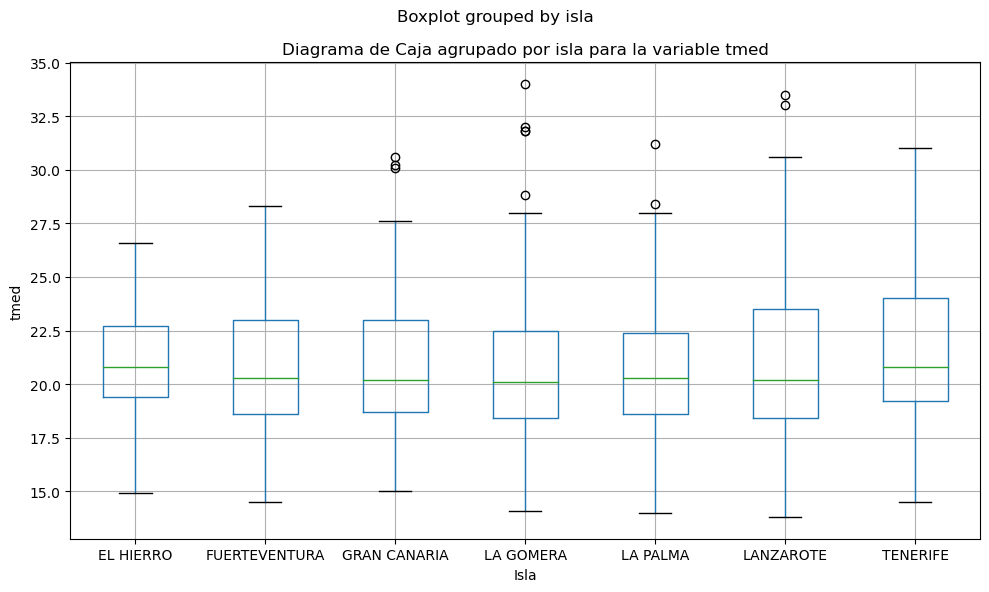

In [18]:
obtener_valores_extremos(datos_aemet, tmed)

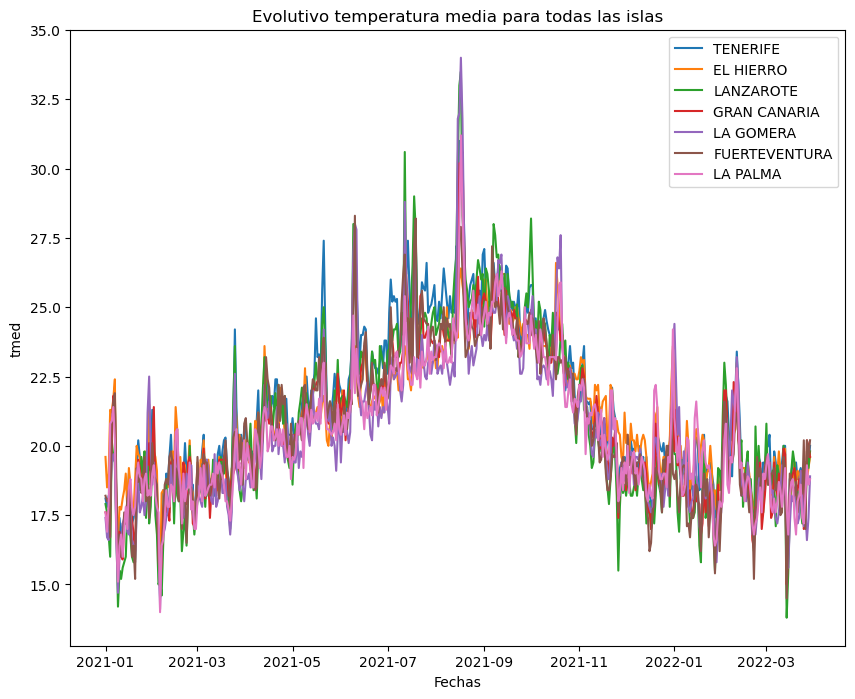

In [19]:
visualizar_evolutivo_islas(datos_aemet, tmed, tit_tmed)

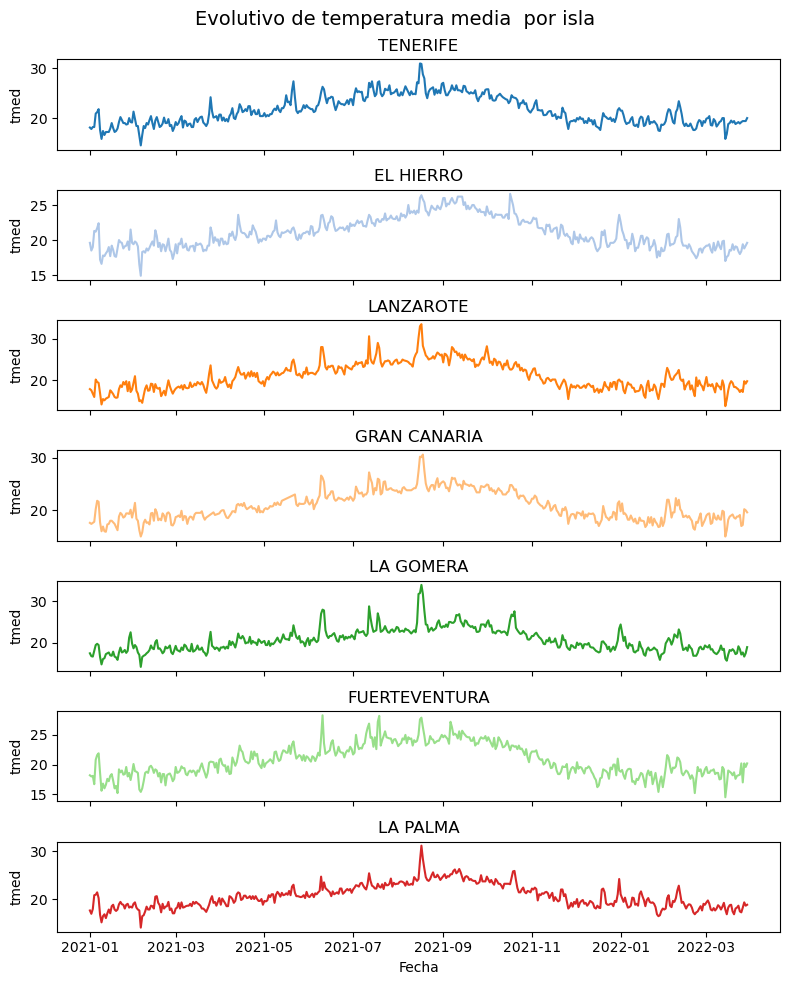

In [20]:
visualizar_evolutivo_por_isla(datos_aemet, tmed, tit_tmed)

<Figure size 1000x600 with 0 Axes>

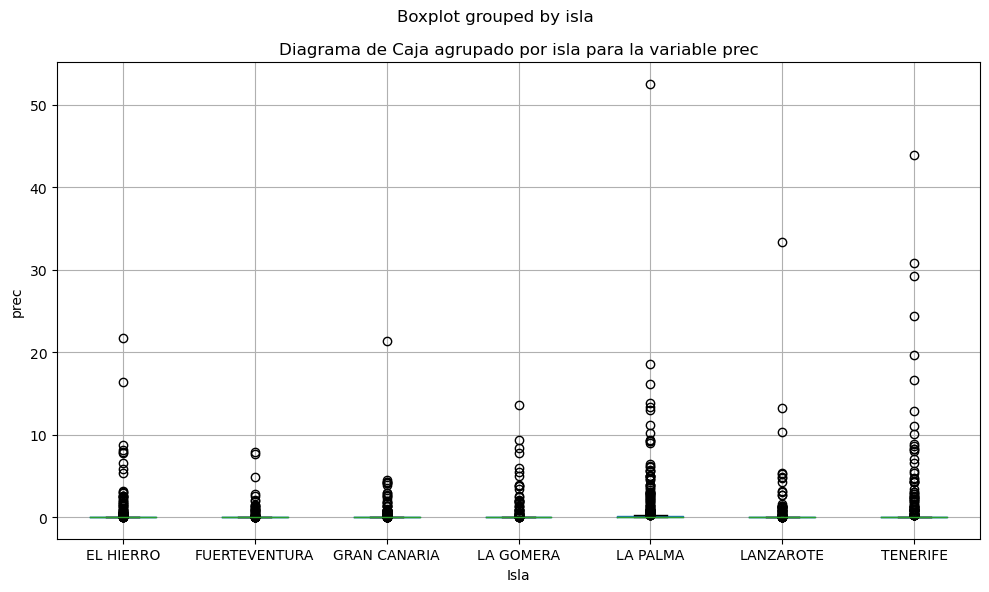

In [21]:
obtener_valores_extremos(datos_aemet, prec)

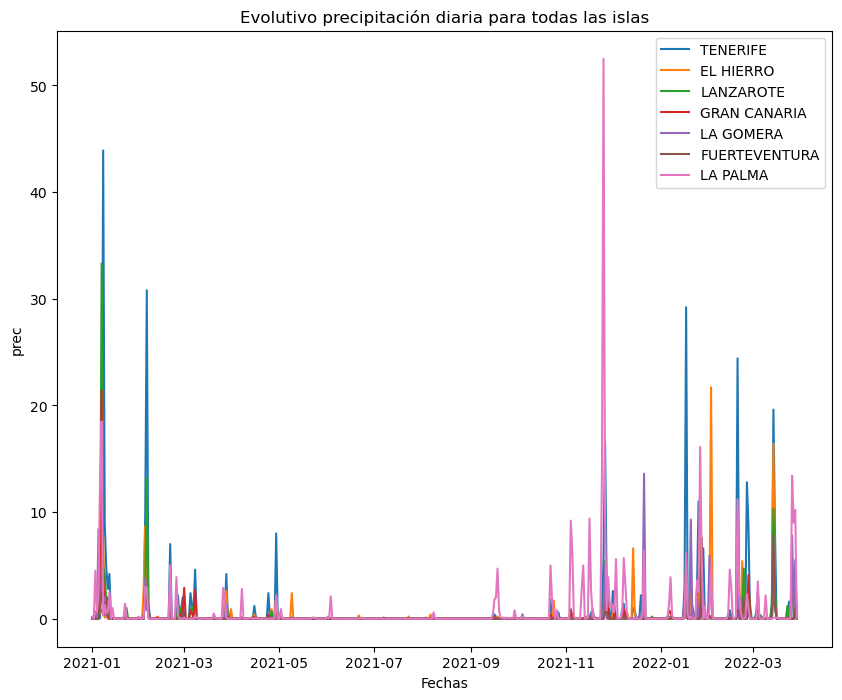

In [22]:
visualizar_evolutivo_islas(datos_aemet, prec, tit_prec)

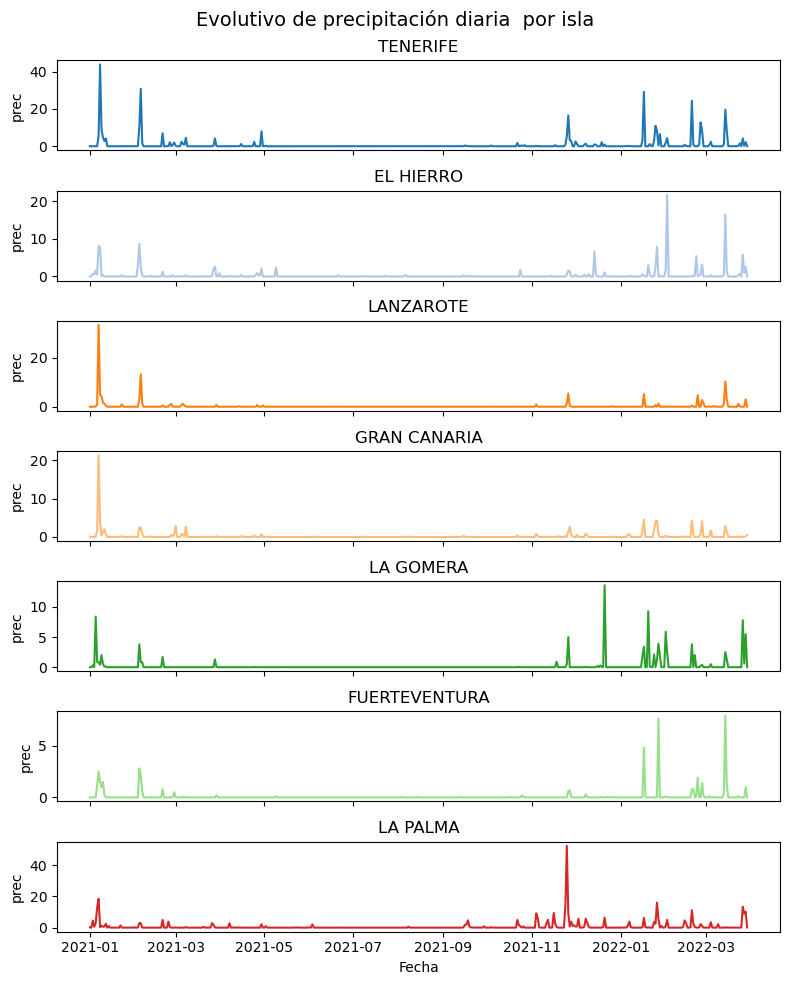

In [23]:
visualizar_evolutivo_por_isla(datos_aemet, prec, tit_prec)

<Figure size 1000x600 with 0 Axes>

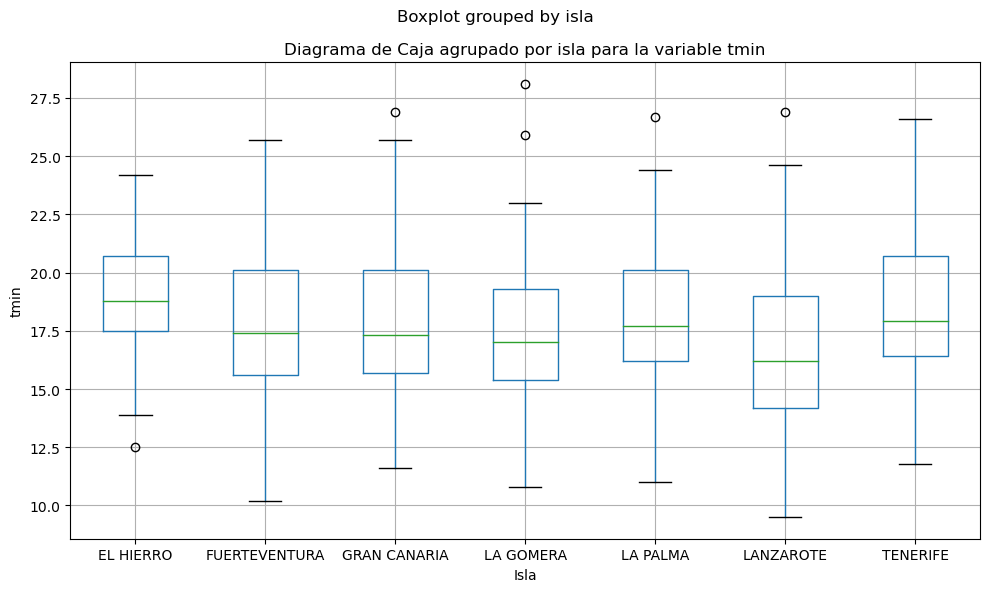

In [24]:
obtener_valores_extremos(datos_aemet, tmin)

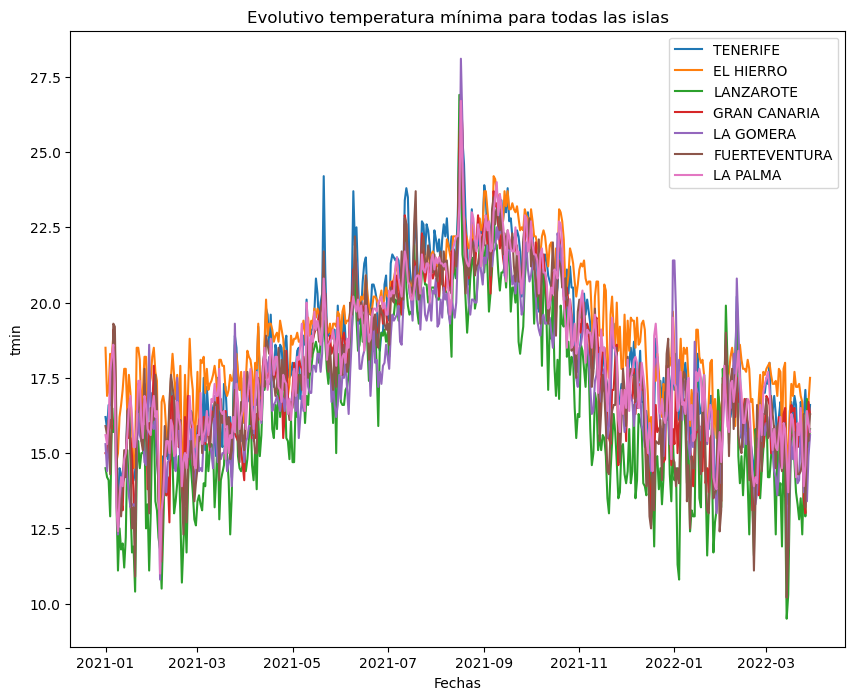

In [25]:
visualizar_evolutivo_islas(datos_aemet, tmin, tit_tmin)

<Figure size 1000x600 with 0 Axes>

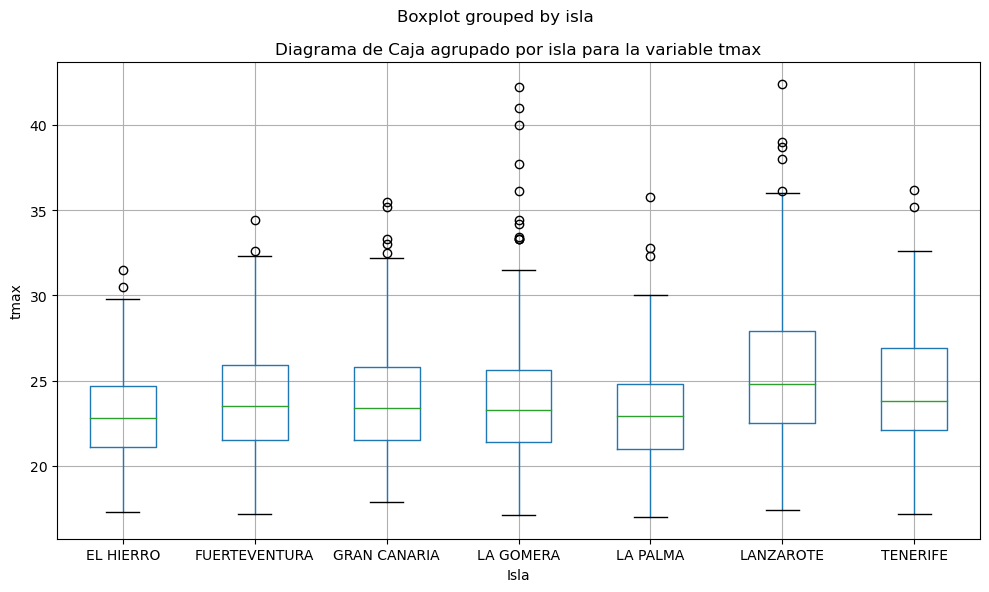

In [26]:
obtener_valores_extremos(datos_aemet, tmax)

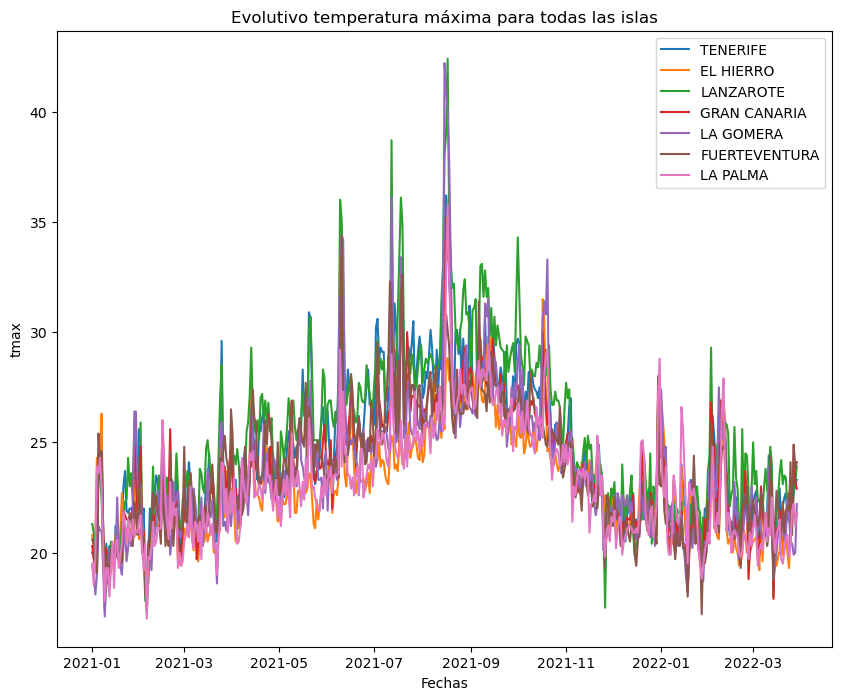

In [27]:
visualizar_evolutivo_islas(datos_aemet, tmax, tit_tmax)

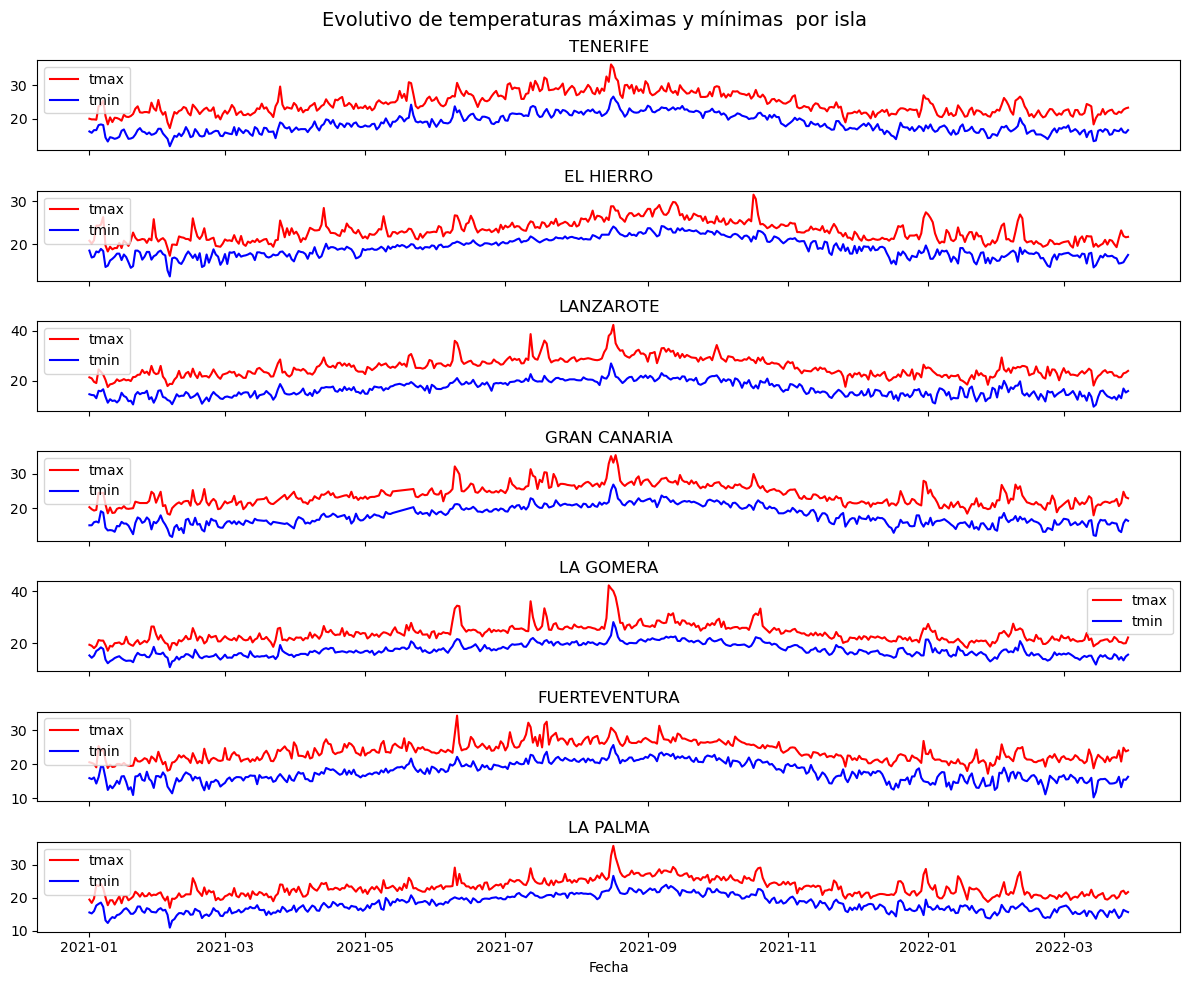

In [28]:
visualizar_evolutivo_por_isla_2_variables(datos_aemet, [tmax, tmin], 'temperaturas máximas y mínimas')

<Figure size 1000x600 with 0 Axes>

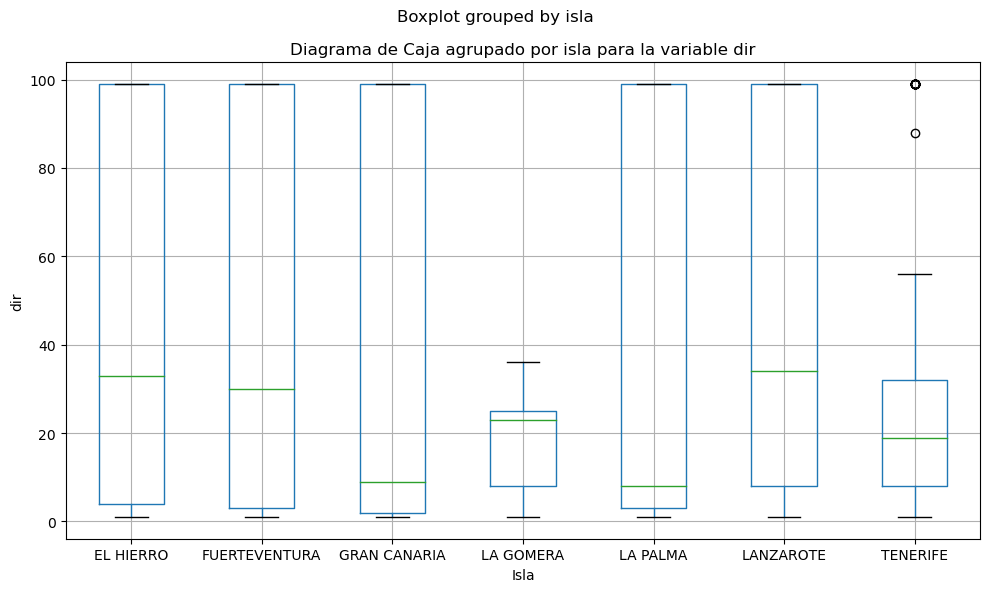

In [29]:
obtener_valores_extremos(datos_aemet, dir)

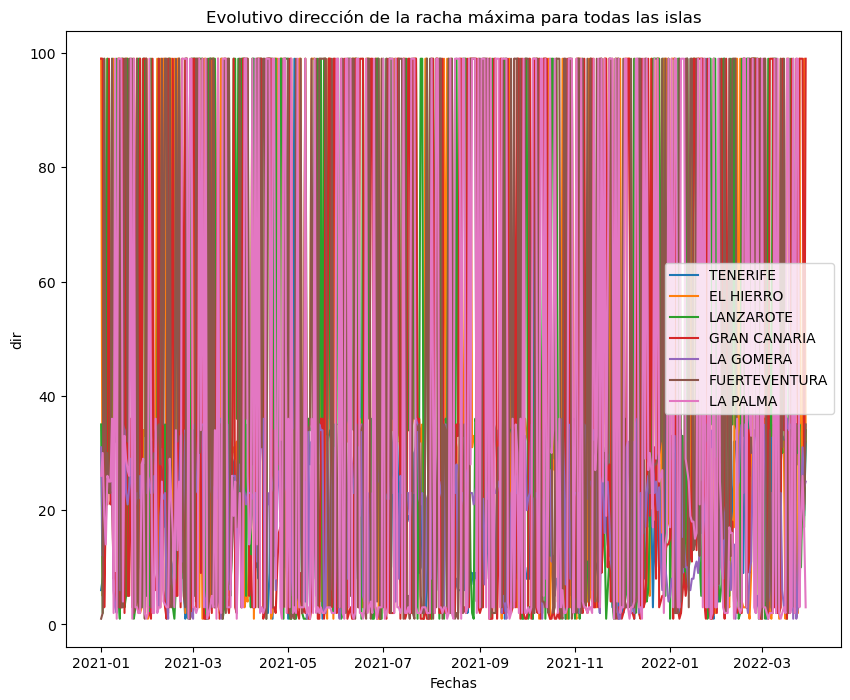

In [30]:
visualizar_evolutivo_islas(datos_aemet, dir, tit_dir)

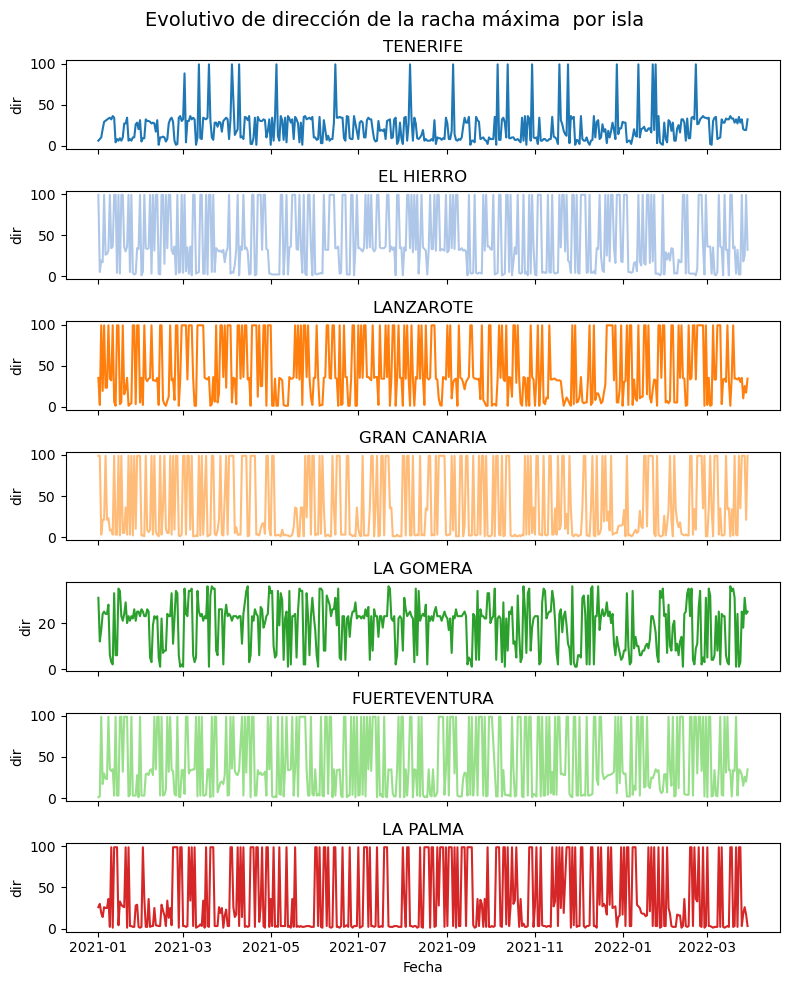

In [31]:
visualizar_evolutivo_por_isla(datos_aemet, dir, tit_dir)

<Figure size 1000x600 with 0 Axes>

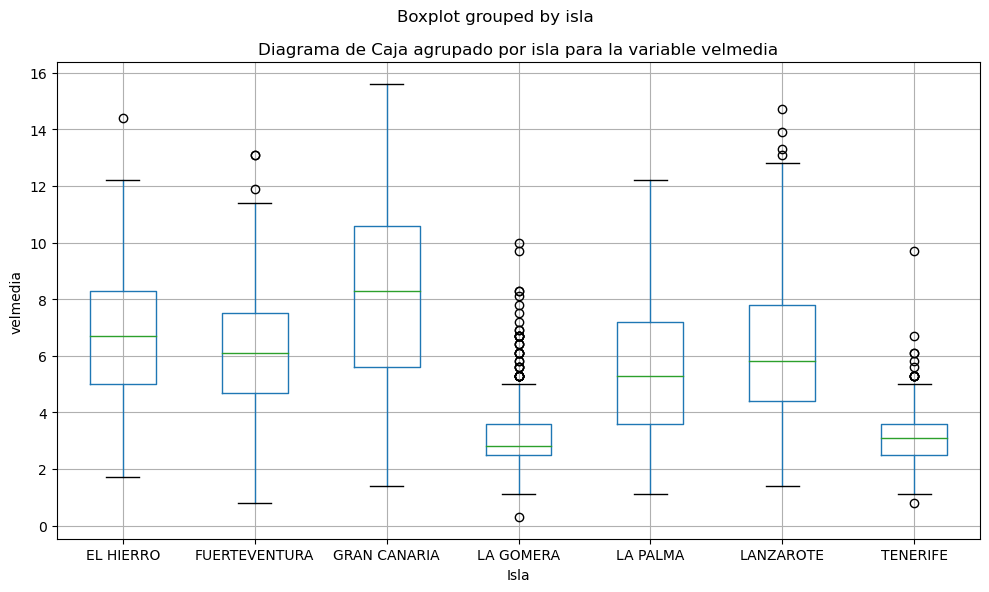

In [32]:
obtener_valores_extremos(datos_aemet, velmedia)

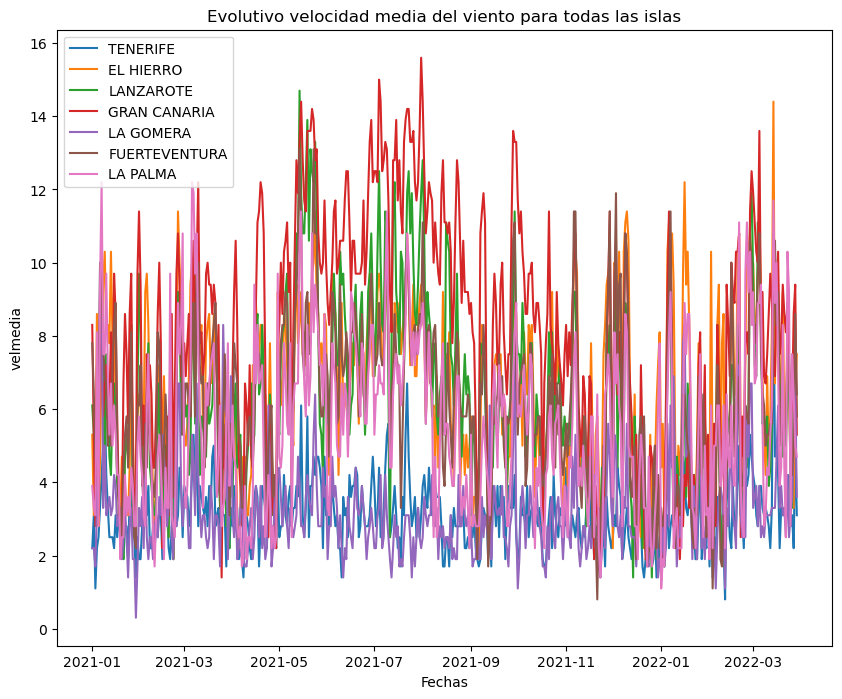

In [33]:
visualizar_evolutivo_islas(datos_aemet, velmedia, tit_velmedia)

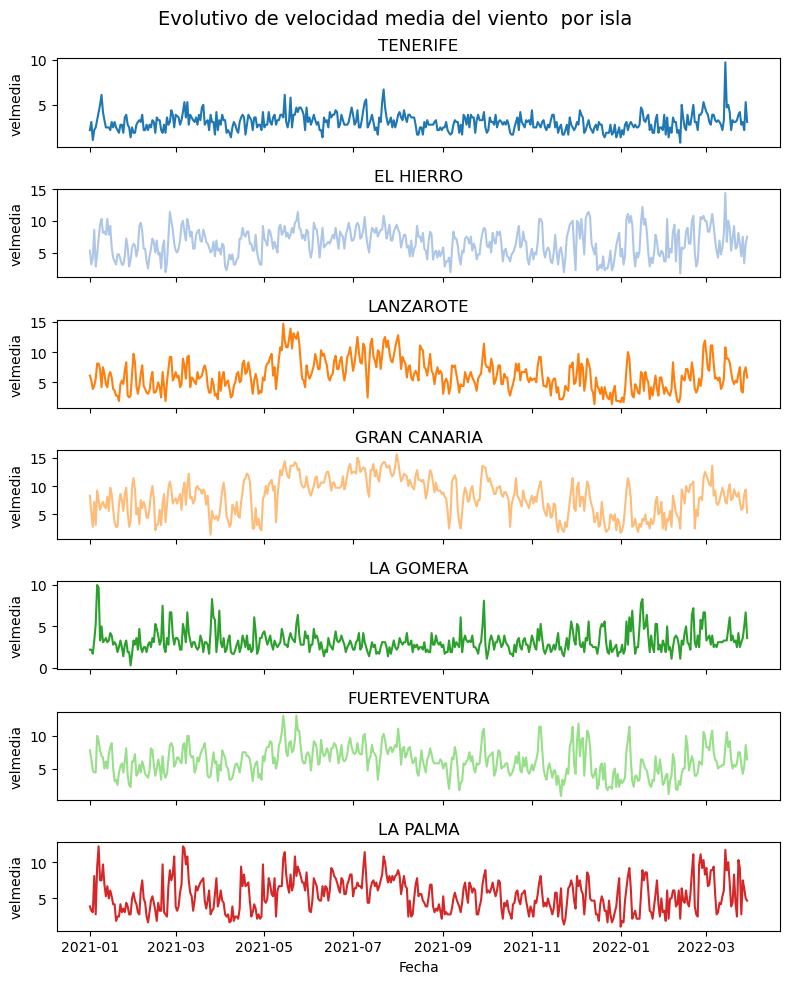

In [34]:
visualizar_evolutivo_por_isla(datos_aemet, velmedia, tit_velmedia)

<Figure size 1000x600 with 0 Axes>

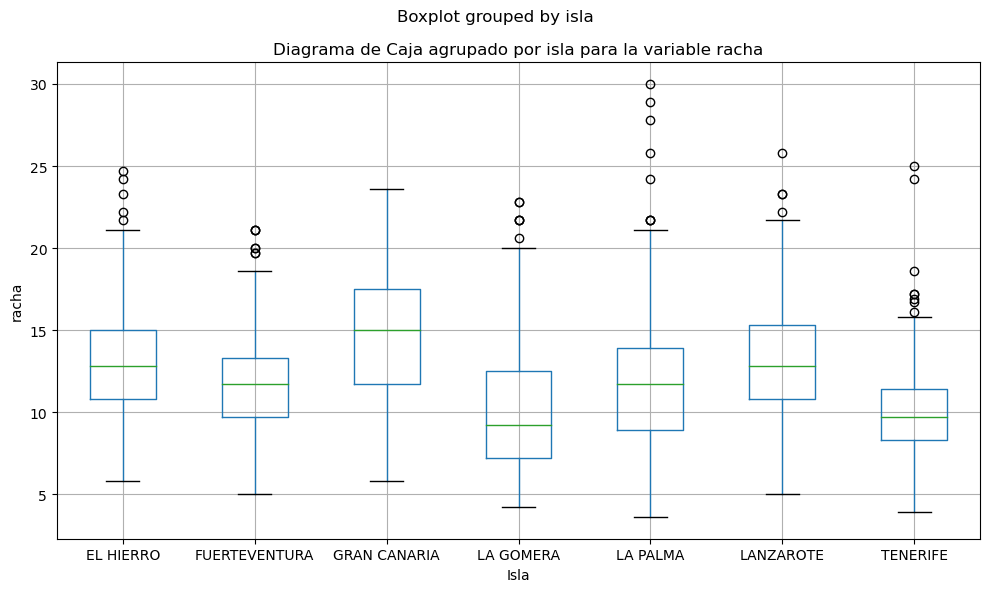

In [35]:
obtener_valores_extremos(datos_aemet, racha)

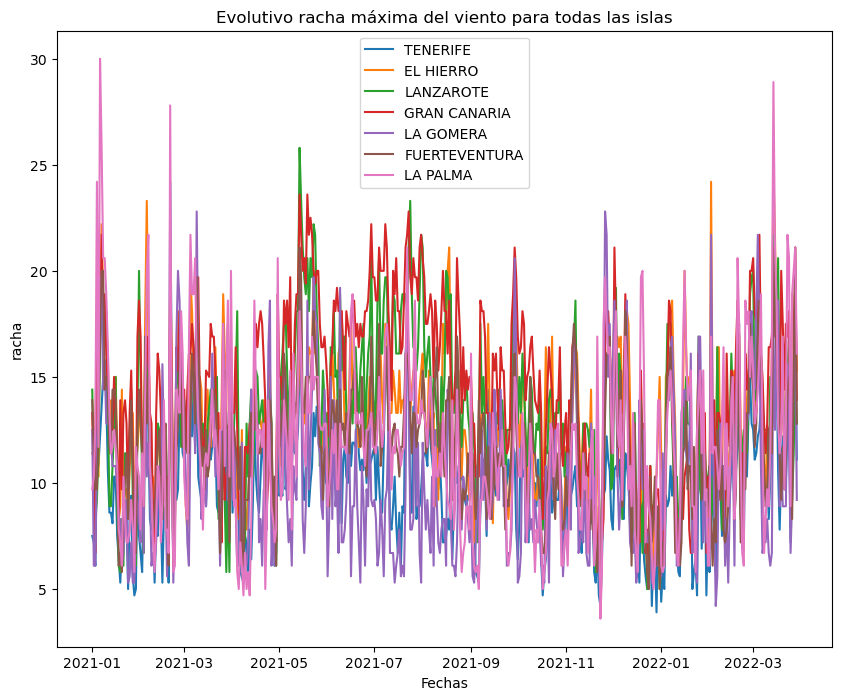

In [36]:
visualizar_evolutivo_islas(datos_aemet, racha, tit_racha)

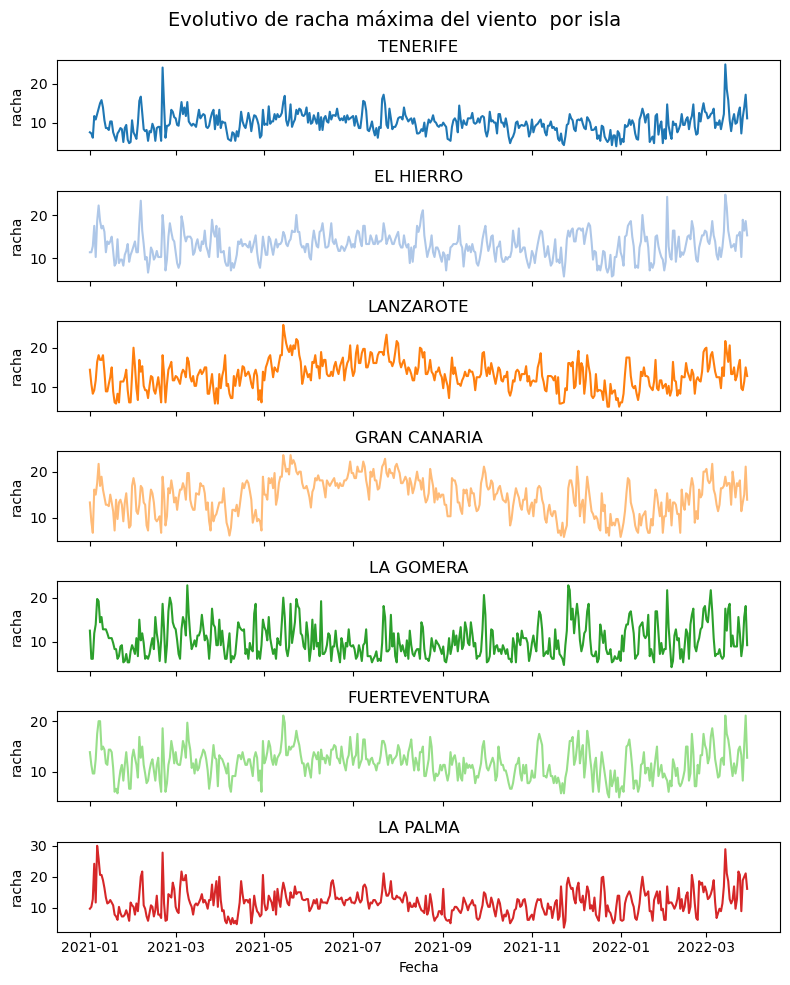

In [37]:
visualizar_evolutivo_por_isla(datos_aemet, racha, tit_racha)

<Figure size 1000x600 with 0 Axes>

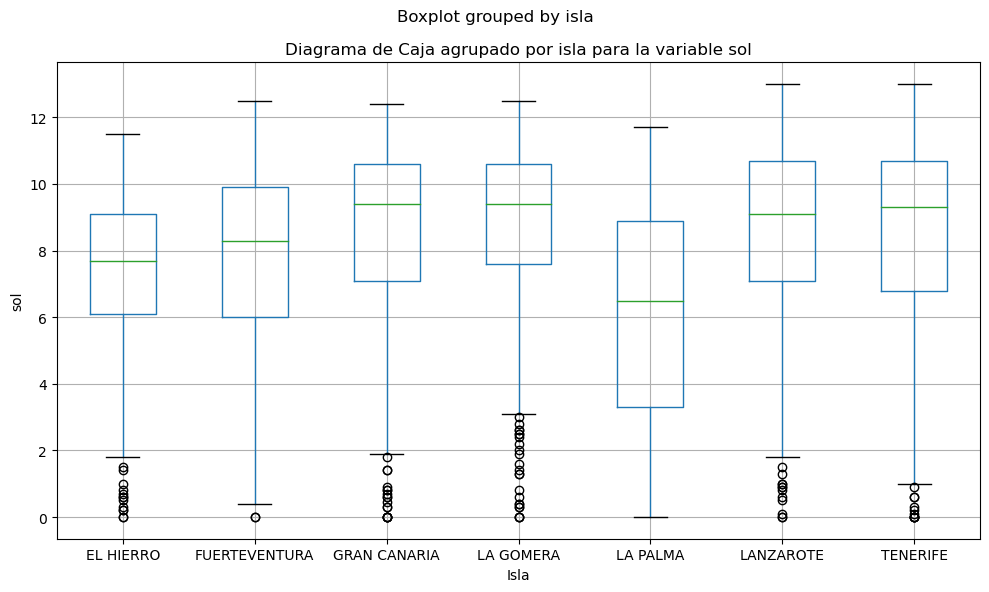

In [38]:
obtener_valores_extremos(datos_aemet, sol)

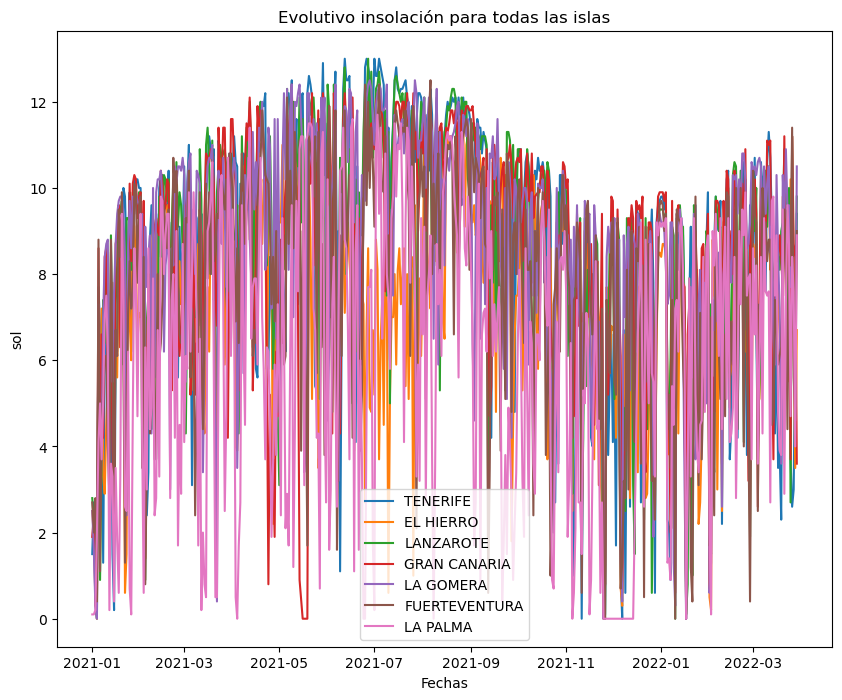

In [39]:
visualizar_evolutivo_islas(datos_aemet, sol, tit_sol)

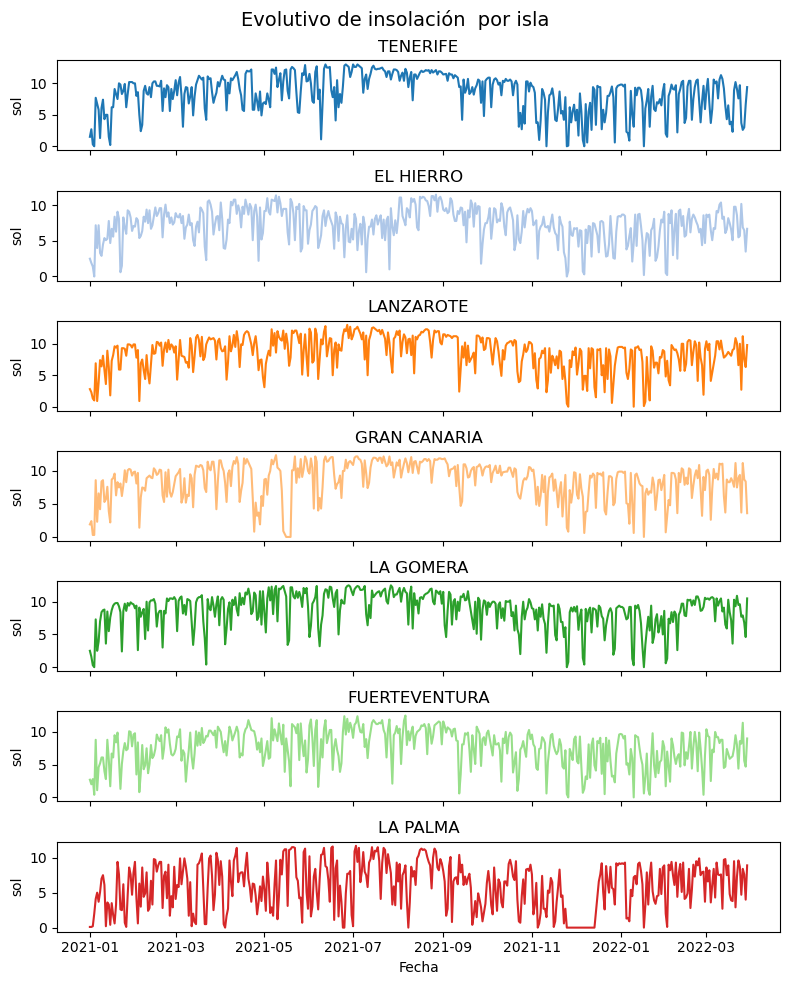

In [40]:
visualizar_evolutivo_por_isla(datos_aemet, sol, tit_sol)

<Figure size 1000x600 with 0 Axes>

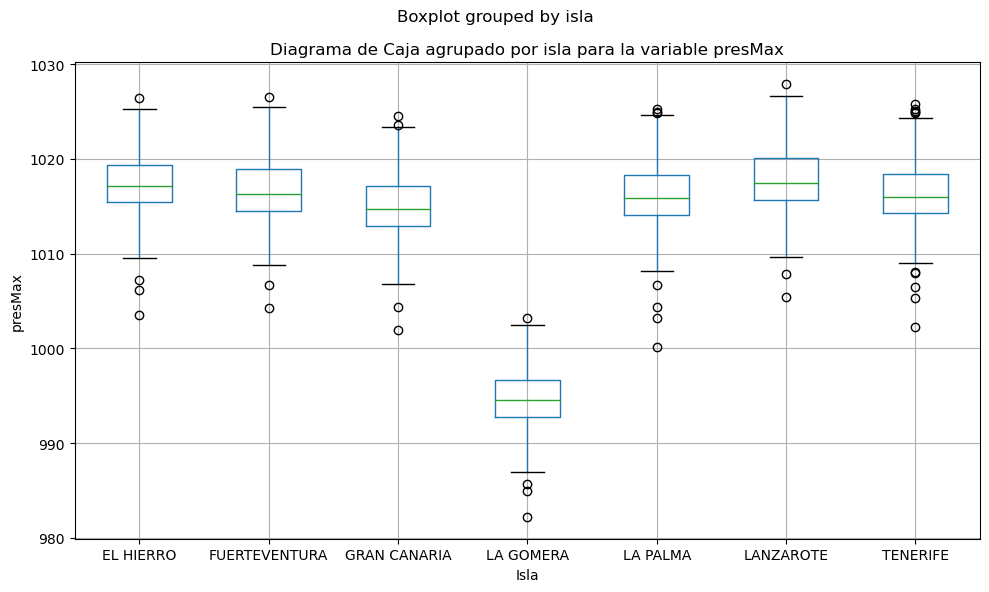

In [41]:
obtener_valores_extremos(datos_aemet, presMax)

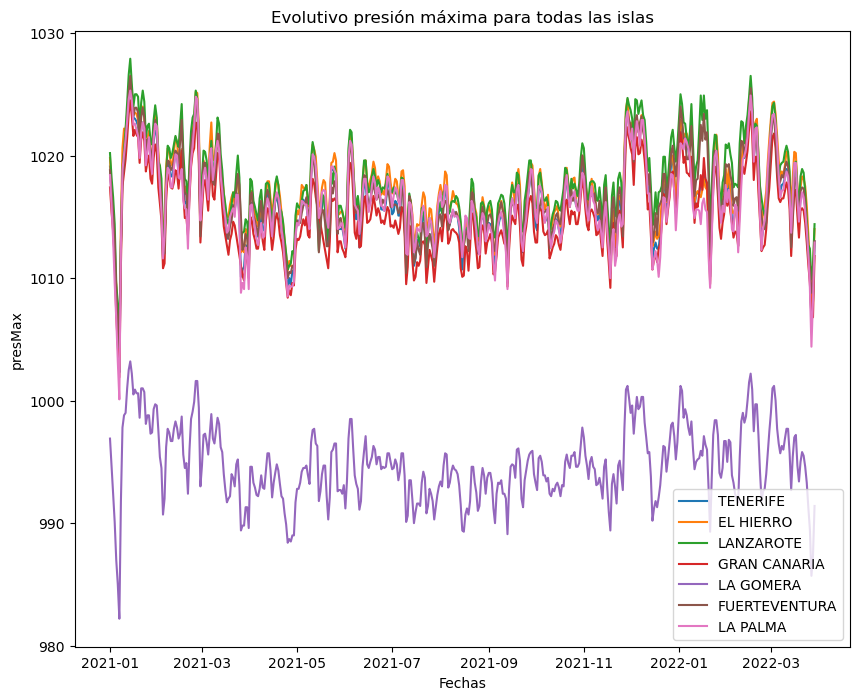

In [42]:
visualizar_evolutivo_islas(datos_aemet, presMax, tit_presMax)

<Figure size 1000x600 with 0 Axes>

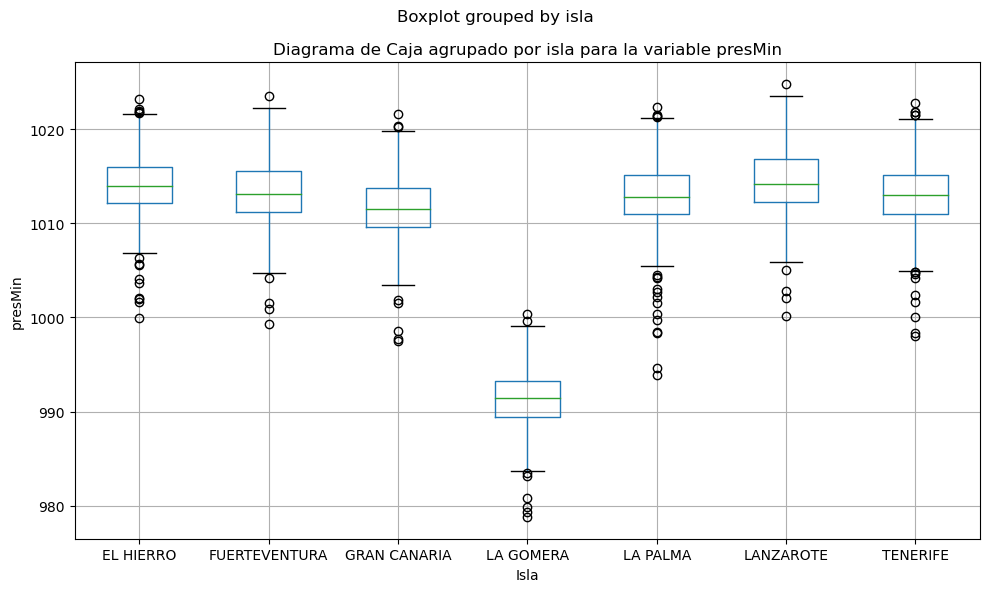

In [43]:
obtener_valores_extremos(datos_aemet, presMin)

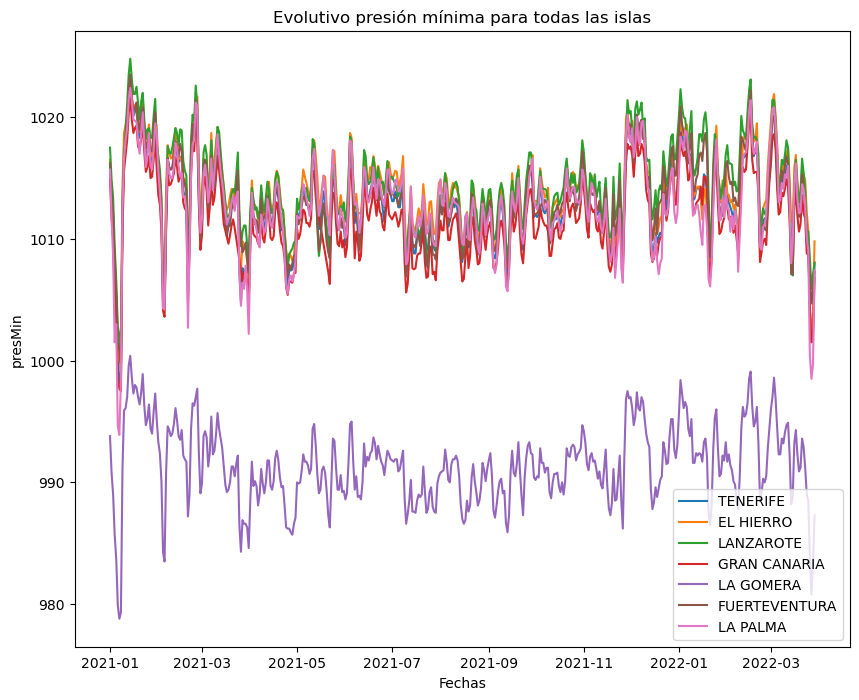

In [44]:
visualizar_evolutivo_islas(datos_aemet, presMin, tit_presMin)

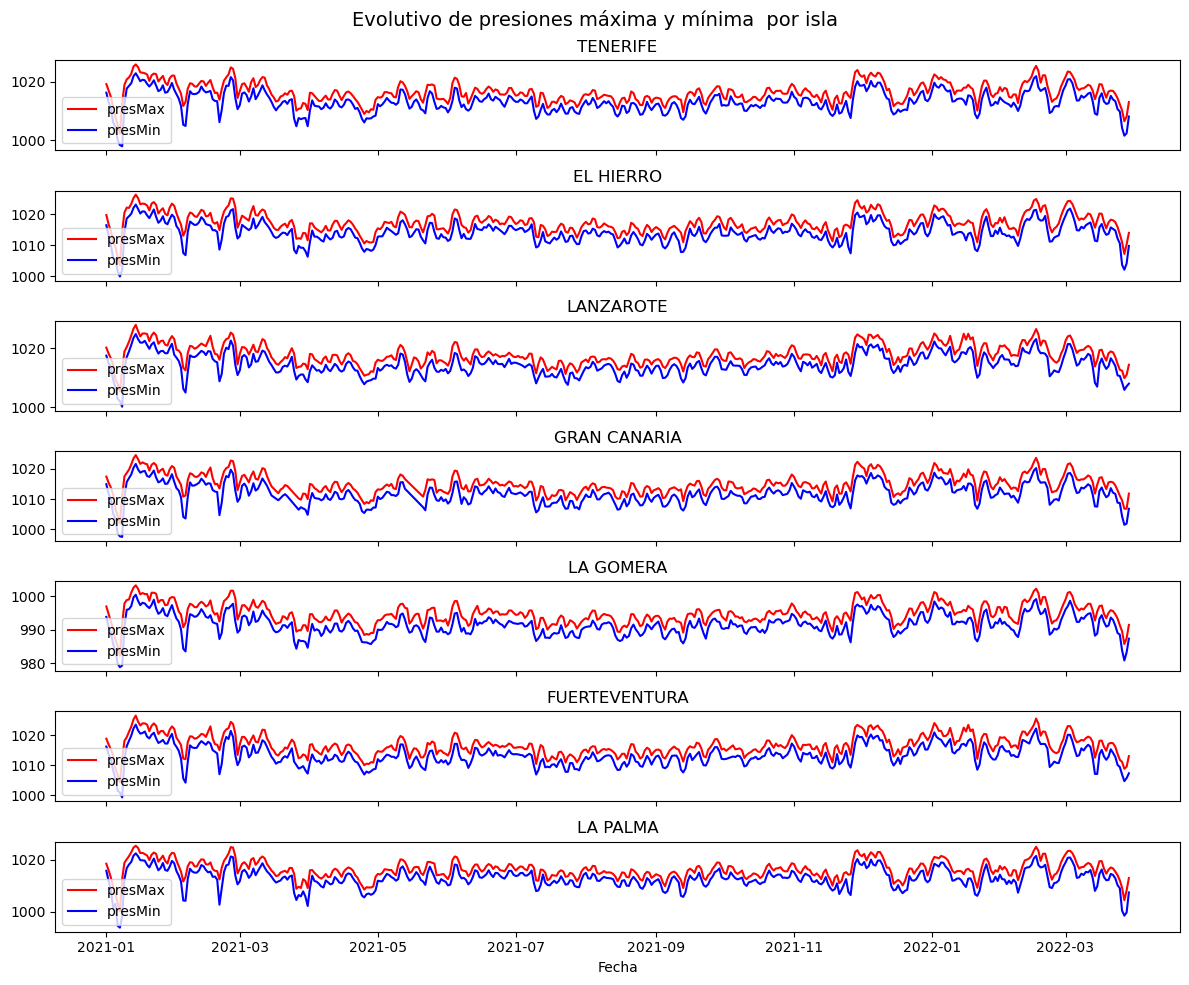

In [45]:
visualizar_evolutivo_por_isla_2_variables(datos_aemet, [presMax, presMin], 'presiones máxima y mínima')

<Figure size 1000x600 with 0 Axes>

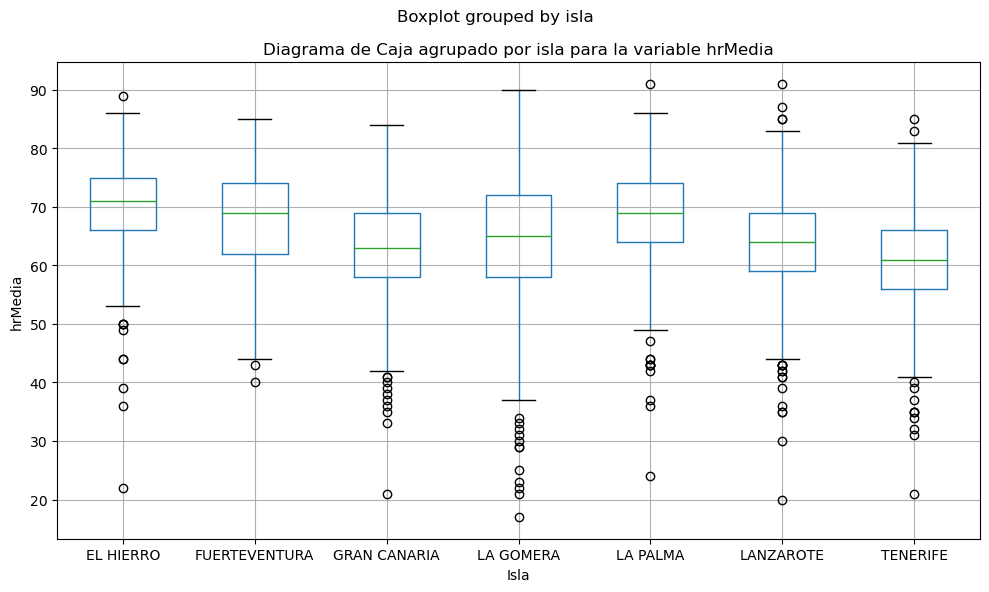

In [46]:
obtener_valores_extremos(datos_aemet, hrMedia)

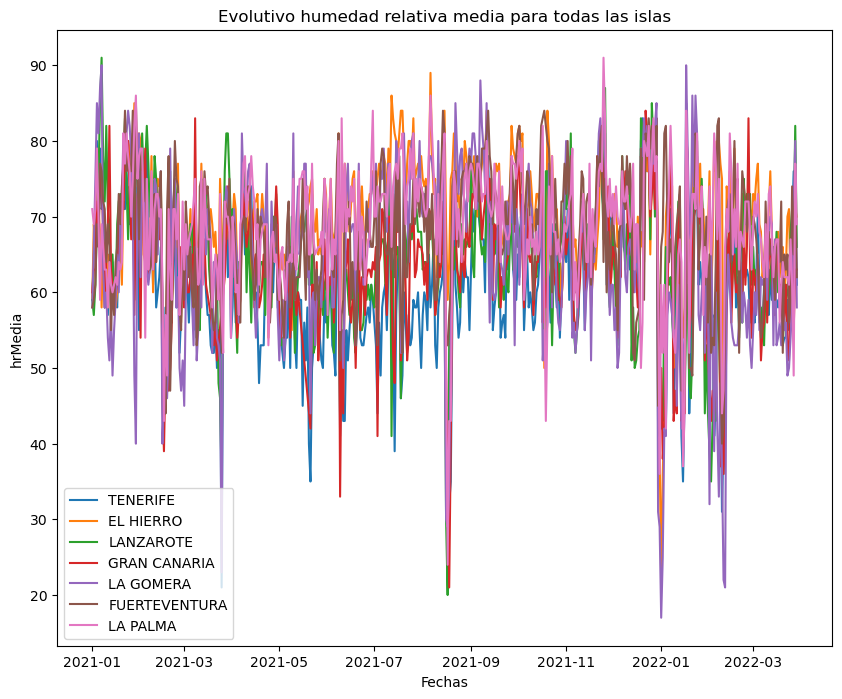

In [47]:
visualizar_evolutivo_islas(datos_aemet, hrMedia, tit_hrMedia)

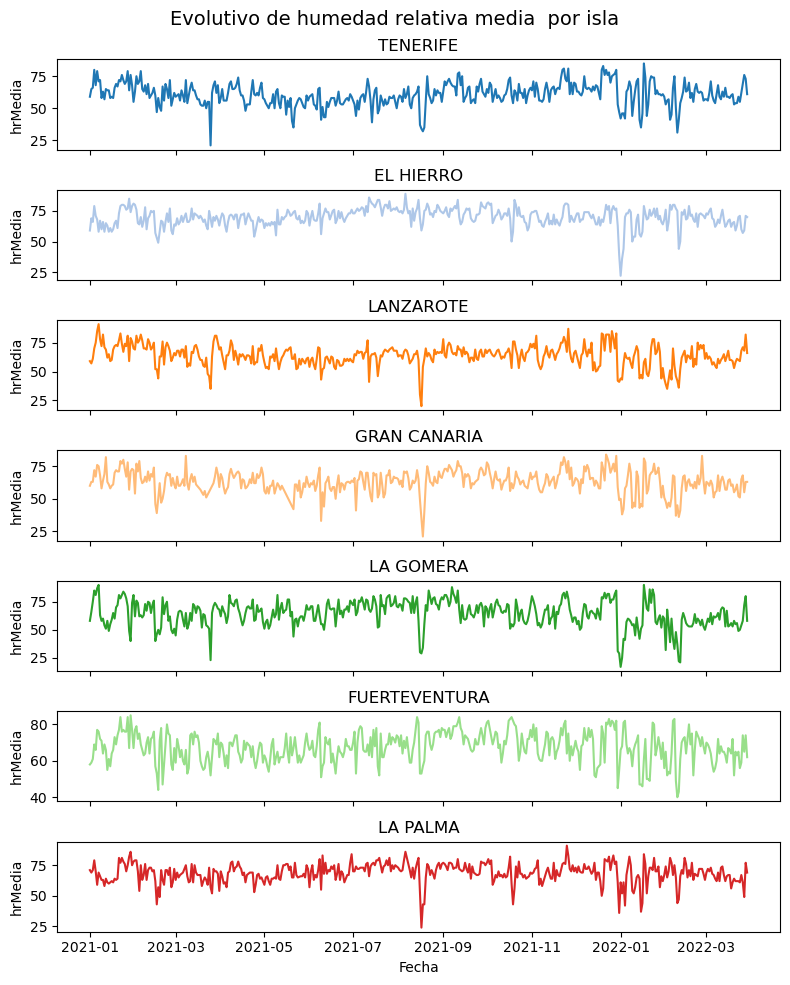

In [48]:
visualizar_evolutivo_por_isla(datos_aemet, hrMedia, tit_hrMedia)

<Figure size 1000x600 with 0 Axes>

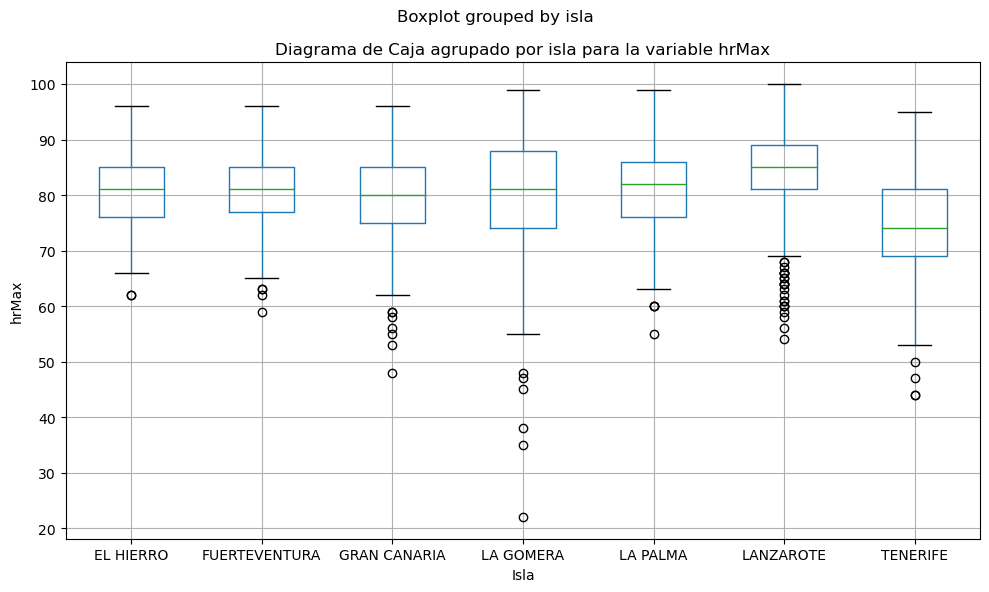

In [49]:
obtener_valores_extremos(datos_aemet, hrMax)

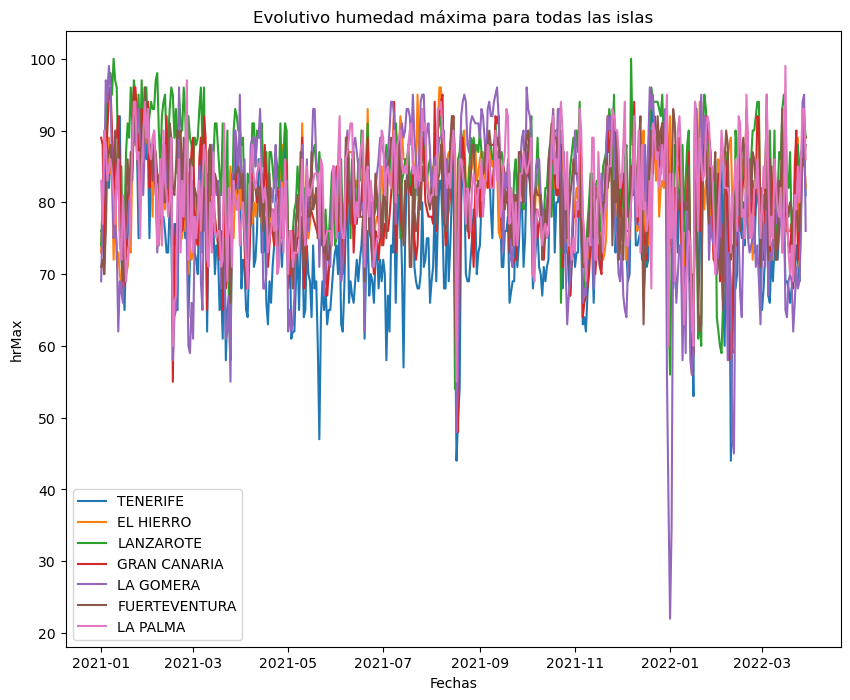

In [50]:
visualizar_evolutivo_islas(datos_aemet, hrMax, tit_hrMax)

<Figure size 1000x600 with 0 Axes>

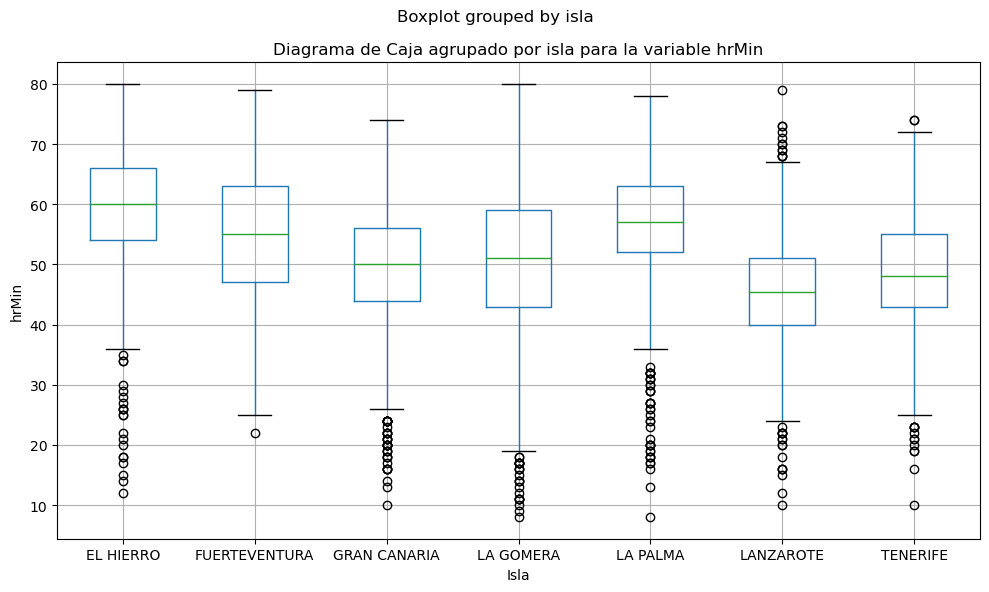

In [51]:
obtener_valores_extremos(datos_aemet, hrMin)

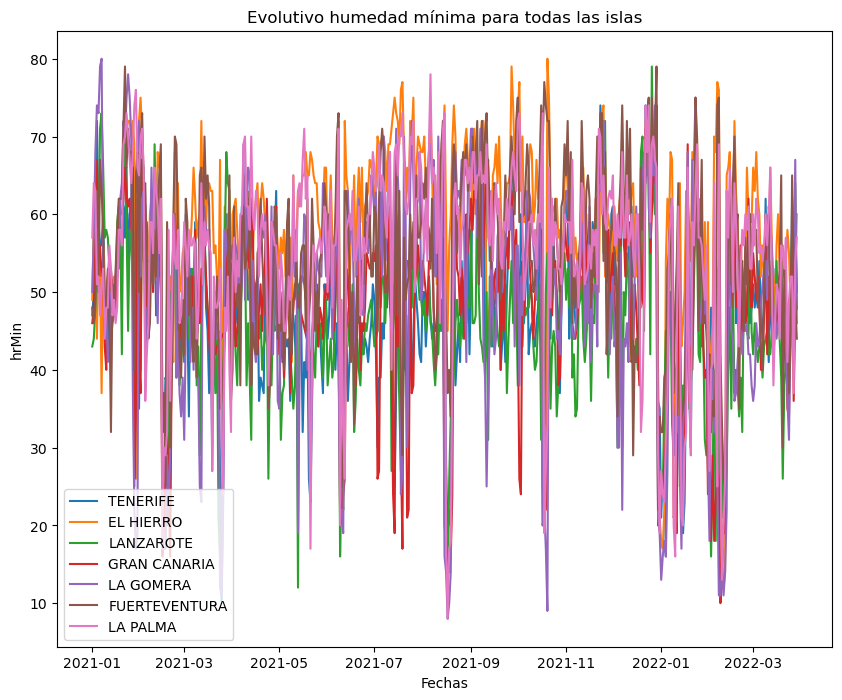

In [52]:
visualizar_evolutivo_islas(datos_aemet, hrMin, tit_hrMin)

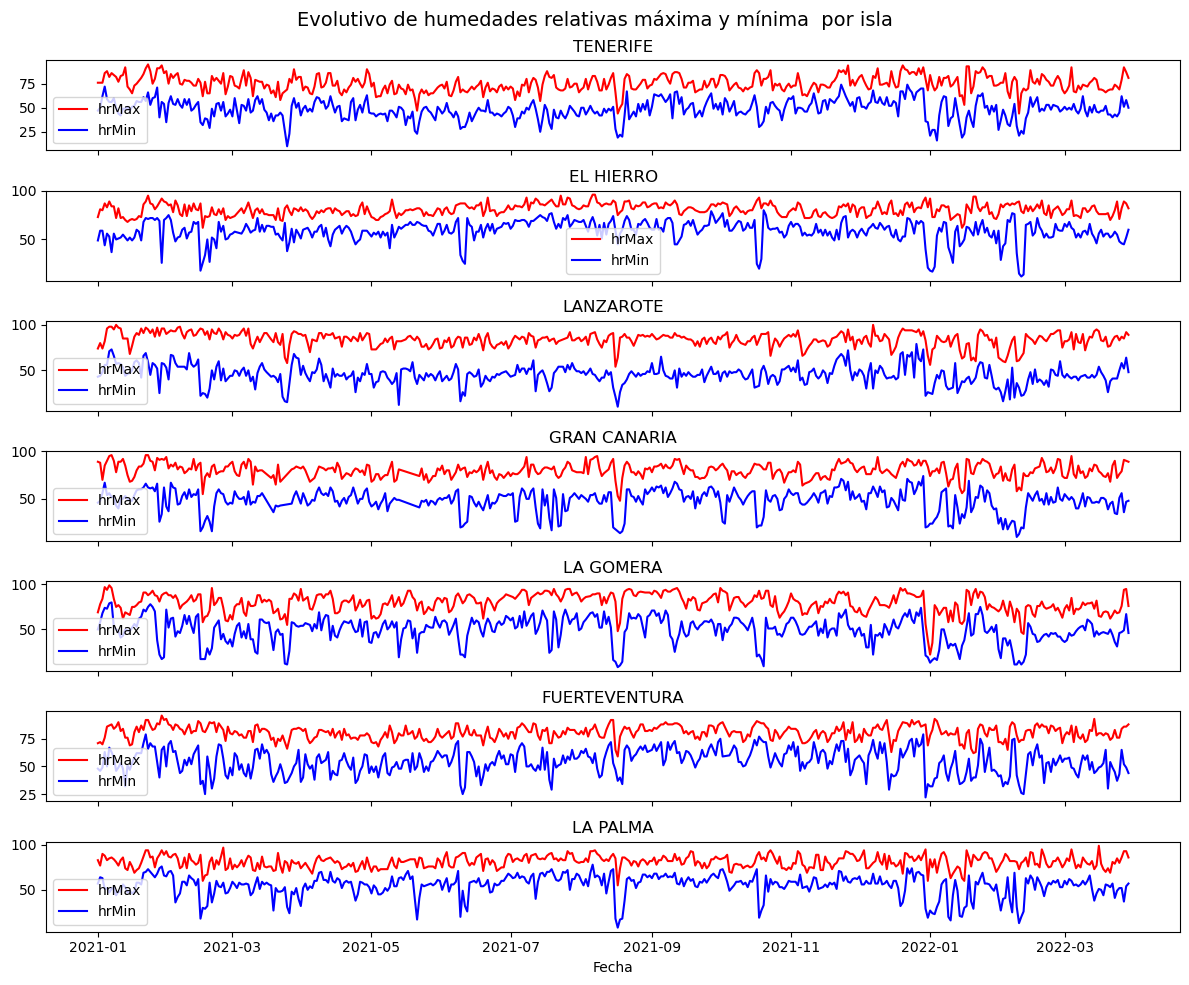

In [53]:
visualizar_evolutivo_por_isla_2_variables(datos_aemet, [hrMax, hrMin], 'humedades relativas máxima y mínima')

In [54]:
ruta_fichero = "../data/Intermedio/" 
nombre_fichero = "datos_aemet.csv"

# Escribimos los datos de la aemet en un ficero
datos_aemet.to_csv(ruta_fichero + nombre_fichero, index=False)

Unimos los datos meteorológicos con los datos de covid

In [55]:
# Cargamos los datos de covid
datos_covid = pd.read_csv('../data/Intermedio/datos_covid.csv', header=0)

# Convertimos los datos de fecha en tipo string para poder realizar la fusión de datos
datos_aemet['fecha'] = datos_aemet['fecha'].astype(str)
datos_covid['fecha'] = datos_covid['fecha'].astype(str)

In [56]:
# Unimos los datos en un dataset final
df_final = pd.merge(datos_covid, datos_aemet, on=['fecha', 'isla'], how='inner')

# Devolvemos el dataset a su formato correcto
df_final['fecha'] = pd.to_datetime(df_final['fecha'])

# rdenamos por fecha los datos
df_final = df_final.sort_values(by='fecha')

Visualizamos los datos finales

In [57]:
df_final

isla      fecha  numero_casos    ia_7dias    ia_14dias  \
0         LANZAROTE 2021-01-01            14   48.134932    77.657690   
1     FUERTEVENTURA 2021-01-01             1   25.891157    49.276718   
2         EL HIERRO 2021-01-01             0   80.739212   107.652283   
3         LA GOMERA 2021-01-01             0   46.129717   156.841037   
4      GRAN CANARIA 2021-01-01            62   49.092892    83.574804   
...             ...        ...           ...         ...          ...   
3158       TENERIFE 2022-03-28           319  407.493399   882.292129   
3159      LANZAROTE 2022-03-28            13  134.777809   282.391600   
3160      LA GOMERA 2022-03-28            13  954.885137  1974.351877   
3161       LA PALMA 2022-03-28            63  626.662513  1386.326056   
3163  FUERTEVENTURA 2022-03-28            22  140.313367   312.364280   

      pcr_total  pcr_positivos  pcr_porcentaje_positivos  \
0           212             16                  7.547170   
1            31              1                  3.225806   
2             1              0                  0.000000   
3             7              1                 14.285714   
4          1017             78                  7.669617   
...         ...            ...                       ...   
3158       1781            464                 26.052779   
3159        266             15                  5.639098   
3160         37             16                 43.243243   
3161        298             78                 26.174497   
3163        169             24                 14.201183   

      pcr_porcentaje_positivos_7dias  Urg_ingr  ...  tmax   dir  velmedia  \
0                           3.298153        20  ...  21.3  35.0       6.1   
1                           4.934823         9  ...  20.6   1.0       7.8   
2                           4.529617         0  ...  20.8  99.0       5.3   
3                          12.459016         0  ...  19.4  31.0       2.2   
4                           5.668176        90  ...  20.3  99.0       8.3   
...                              ...       ...  ...   ...   ...       ...   
3158                       28.630549       260  ...  23.1  19.0       5.3   
3159                       17.935192        25  ...  23.2  17.0       7.5   
3160                       44.134078         0  ...  20.0  24.0       6.7   
3161                       27.955056        21  ...  21.2  17.0       5.0   
3163                       15.745568        23  ...  23.8  20.0       8.6   

      racha  sol  presMax  presMin  hrMedia  hrMax  hrMin  
0      14.4  2.8   1020.2   1017.5     59.0   74.0   43.0  
1      13.9  2.7   1018.8   1016.2     58.0   71.0   48.0  
2      11.4  2.5   1019.8   1016.5     59.0   73.0   49.0  
3      12.5  2.5    996.9    993.8     58.0   69.0   50.0  
4      13.3  1.9   1017.4   1014.9     60.0   89.0   46.0  
...     ...  ...      ...      ...      ...    ...    ...  
3158   17.2  6.6   1008.1   1002.4     73.0   87.0   58.0  
3159   15.0  6.3   1011.0   1007.1     82.0   92.0   64.0  
3160   18.1  4.6    987.4    983.2     80.0   95.0   67.0  
3161   21.1  4.0   1008.2    999.7     77.0   93.0   54.0  
3163   21.1  4.7   1009.5   1005.7     74.0   86.0   49.0  

[3164 rows x 30 columns]

In [58]:
ruta_fichero = "../data/Final/" 
nombre_fichero = "datos_final.csv"

# Escribimos los datos en fichero
df_final.to_csv(ruta_fichero + nombre_fichero, index=False)